In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn')

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv',url=URL,force_download=False):
    if force_download or not os.path.exists(filename):
        from urllib.request import urlretrieve
        urlretrieve(URL,'Fremont.csv')
    data = pd.read_csv('Fremont.csv',index_col='Date',parse_dates=True)
    data.drop('Fremont Bridge Total',axis=1,inplace=True)
    data.columns = ['East','West']
    return data


In [48]:
data=get_fremont_data()

data.head(150)

,East,West
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0
...,...,...
2012-10-09 01:00:00,1.0,2.0
2012-10-09 02:00:00,2.0,2.0
2012-10-09 03:00:00,5.0,3.0


<AxesSubplot:xlabel='Date'>

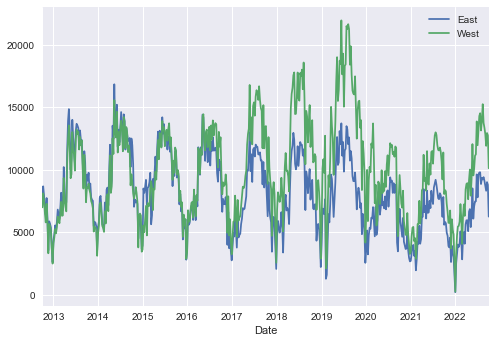

In [49]:


data.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

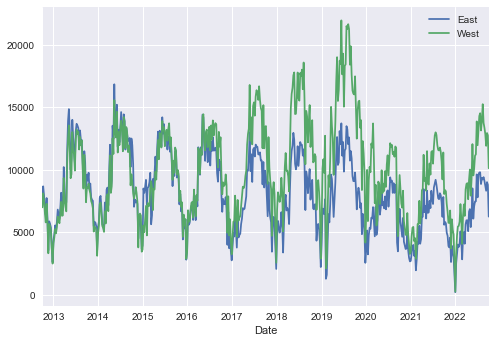

In [50]:

data.resample('W').sum().plot()


<AxesSubplot:xlabel='Date'>

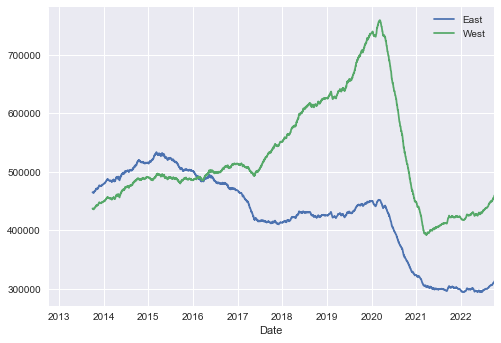

In [51]:
data.resample('D').sum().rolling(365).sum().plot()

<AxesSubplot:xlabel='time'>

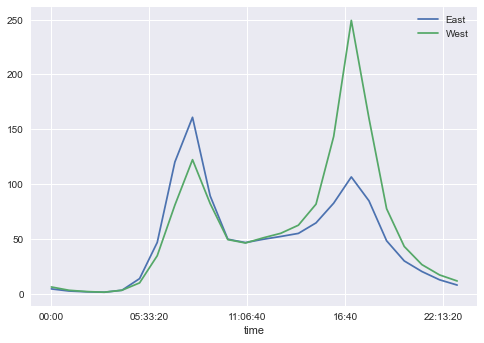

In [52]:
data.groupby(data.index.time).mean().plot()

In [53]:
data['Total'] = data['East'] + data['West']

In [54]:
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)
data.iloc[:5,:5]

,East,West,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


<AxesSubplot:xlabel='time'>

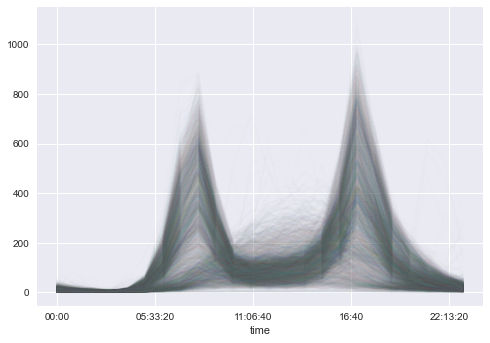

In [55]:
pivoted.plot(legend=False,alpha=0.01)